In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import predict 

In [2]:
dataset = pd.read_csv('data.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [3]:
def standardize(x):
    x_mean = np.mean(x)
    x_std = np.std(x)
    x_stand = (x - x_mean) / x_std
    return x_stand

x_initial = x
y_initial = y

x = standardize(x)
y = standardize(y)

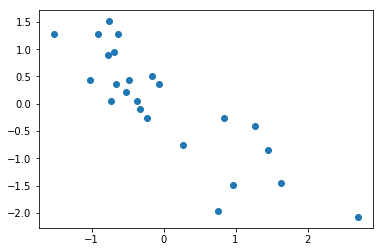

In [4]:
plt.scatter(x, y)

In [5]:
y = y.reshape(y.shape[0],1)

In [6]:
X = np.hstack((x, np.ones(x.shape)))
X.shape

(24, 2)

In [12]:
theta = predict.get_params()
print(theta)


[[ 0.]
 [ 0.]]


In [13]:
def model(X, theta):
    return X.dot(theta)

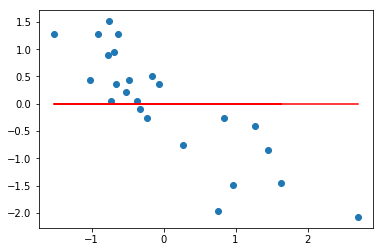

In [14]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

In [15]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)


In [16]:
cost_function(X, y, theta)

0.5

In [17]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [18]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [55]:
learning_rate=0.01
n_iterations=3000
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

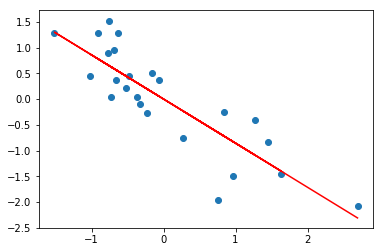

In [56]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

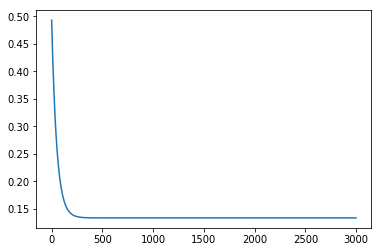

In [57]:
plt.plot(range(n_iterations), cost_history)

In [58]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [59]:
coef_determination(y, predictions)

0.73297470783149654

In [60]:
def MoindreCarre(x, y):
    x_sum = 0.
    x2_sum = 0.
    y_sum = 0.
    xy_sum = 0.
    
    for xi, yi in zip(x, y):
        x_sum += xi
        x2_sum += xi**2
        y_sum += yi
        xy_sum += xi * yi
        
    npoints = len(x)
    a = (npoints * xy_sum - x_sum * y_sum) / (npoints * x2_sum - x_sum**2)
    b = (x2_sum * y_sum - x_sum * xy_sum) / (npoints * x2_sum - x_sum**2)
    return a, b

In [61]:
a2, b2 = MoindreCarre(x, y)
theta2 = np.array([a2, b2])
predictions_destand = model(X, theta_destand)

In [62]:
coef_determination(y, predictions_destand)

0.73297470783149654

In [63]:
print(theta_final)
print(theta_destand)

[[ -8.56139421e-01]
 [  2.45775622e-16]]
[[ -8.56139421e-01]
 [  1.55983110e-16]]


In [64]:
a = theta_final[0]
b = theta_final[1]

def destandardize(a, b, xi, yi):
    y_mean = np.mean(yi)
    x_mean = np.mean(xi)
    y_std = np.std(yi)
    x_std = np.std(xi)
    
    a_destand = (y_std * a) / x_std
    div = (a * x_mean) / x_std
    b_destand = y_mean + (y_std * (b - div))
    return a_destand, b_destand

a_destand, b_destand = destandardize(a, b, x_initial, y_initial)

In [65]:
def save_theta(a, b):
    with open('params.txt', 'w') as file:
        thetas = file.write(f'{a} \n{b}')

In [66]:
save_theta(float(a_destand), float(b_destand))